In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 60 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 30
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 1





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/wilshire_30yr_3param.json
{   'params': {   'amounts': [0.9268792862300037, 0.99, -0.99],
                  'qs': [-0.44105495612491763, -0.9806900046161695, 0.99]},
    'sd': 0.06996758985186487,
    'window': 20}
 1: Final value: $55593.11 (window = 20; sd = 0.070)

% in now: 1.0
Actions taken: 537
Wrote params to ../data/pct_params/wilshire_30yr_3param.json


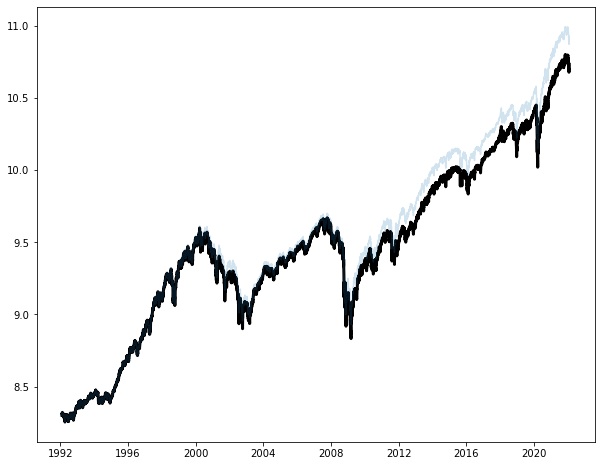

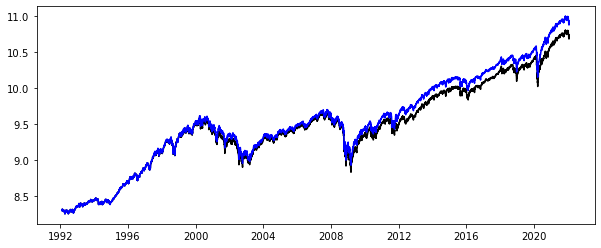

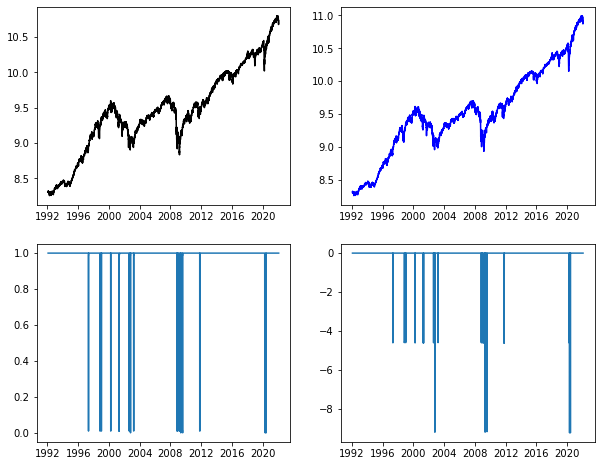



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/wilshire_30yr_2param.json
{   'params': {'amounts': [0.99, -0.99], 'qs': [-0.8459363955133504, 0.99]},
    'sd': 0.11109076634389986,
    'window': 20}
 1: Final value: $51126.04 (window = 20; sd = 0.111)

% in now: 1.0
Actions taken: 300
Wrote params to ../data/pct_params/wilshire_30yr_2param.json


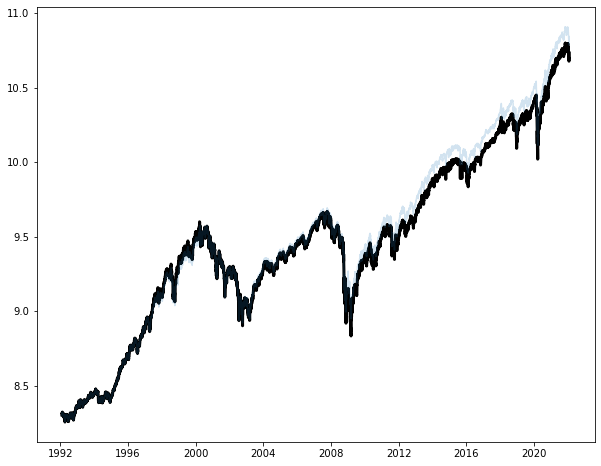

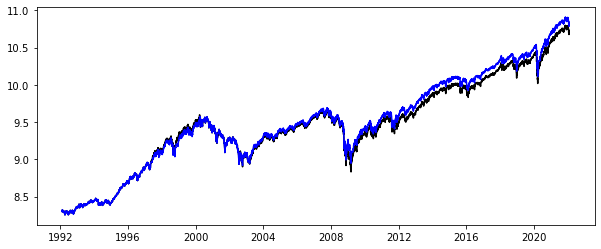

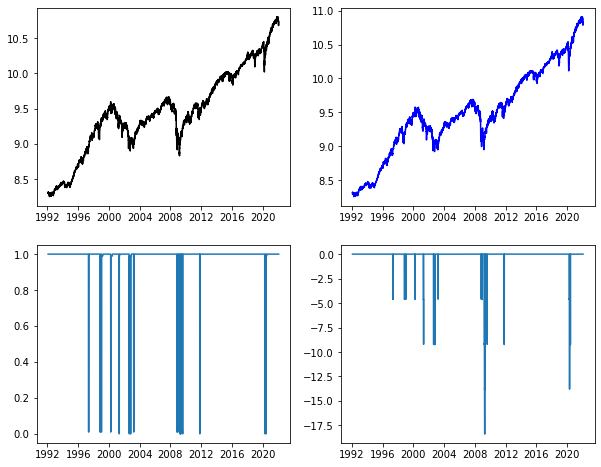



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/wilshire_30yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.6008890388326373]},
    'sd': 0.0872815867619244,
    'window': 20}
 1: Final value: $45806.20 (window = 20; sd = 0.087)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/wilshire_30yr_1param.json


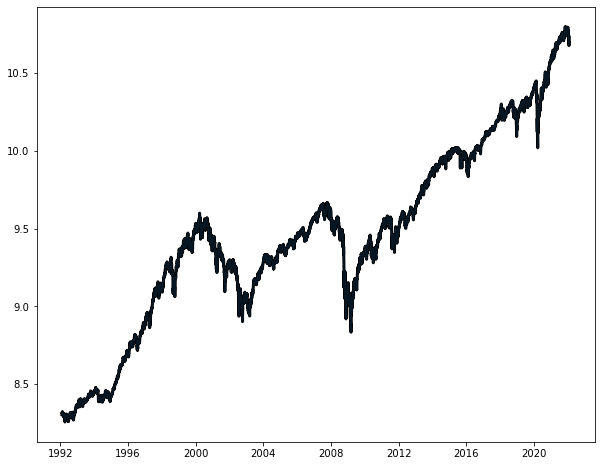

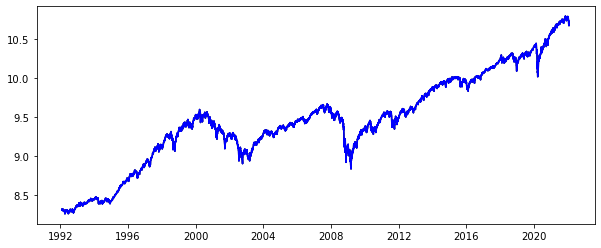

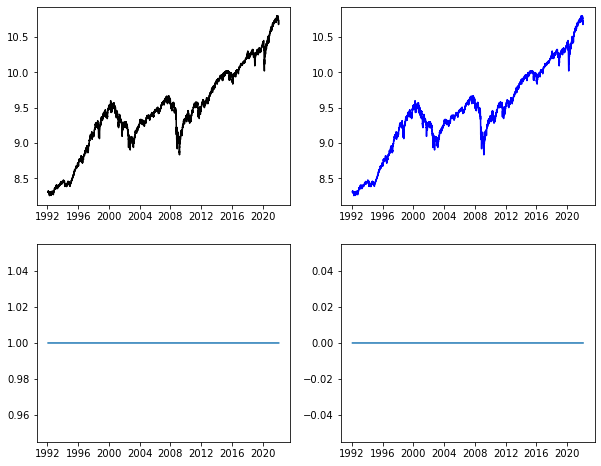




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/nasdaq_30yr_3param.json
{   'params': {   'amounts': [-0.99, 0.99, 0.2355630673363699],
                  'qs': [   0.02611169640058919,
                            0.4500561633968526,
                            -0.6785364626560175]},
    'sd': 0.05608816030157659,
    'window': 20}
 1: Final value: $32934.71 (window = 20; sd = 0.056)

% in now: 0.010382466642213508
Actions taken: 898
Wrote params to ../data/pct_params/nasdaq_30yr_3param.json


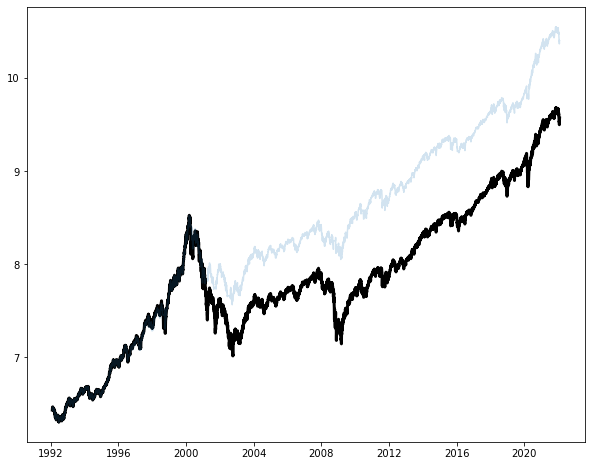

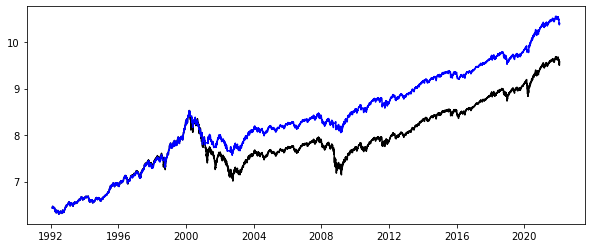

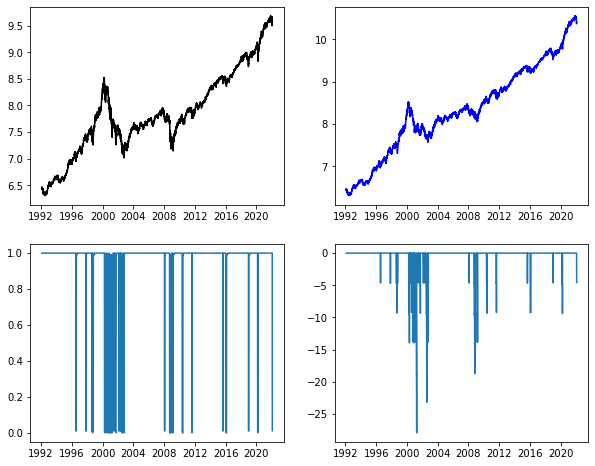



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/nasdaq_30yr_2param.json
{   'params': {   'amounts': [0.3714080561987594, -0.5482418829396456],
                  'qs': [0.05714071114297509, 0.851557710097242]},
    'sd': 0.08498206106299483,
    'window': 1000}
 1: Final value: $28845.45 (window = 1000; sd = 0.085)

% in now: 0.9999269723318925
Actions taken: 25
Wrote params to ../data/pct_params/nasdaq_30yr_2param.json


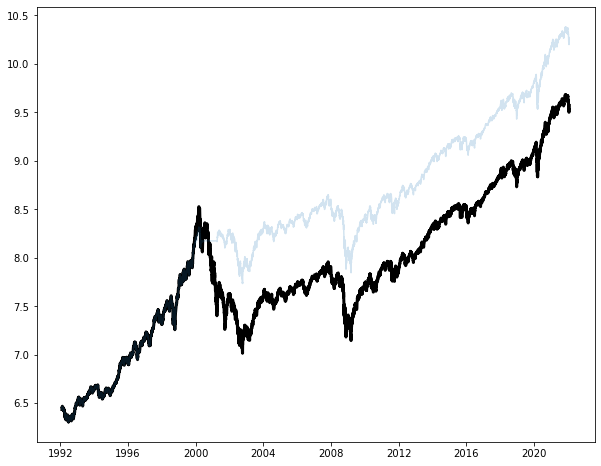

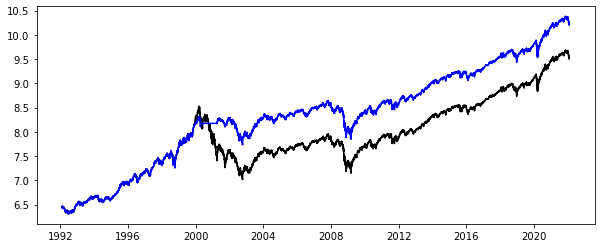

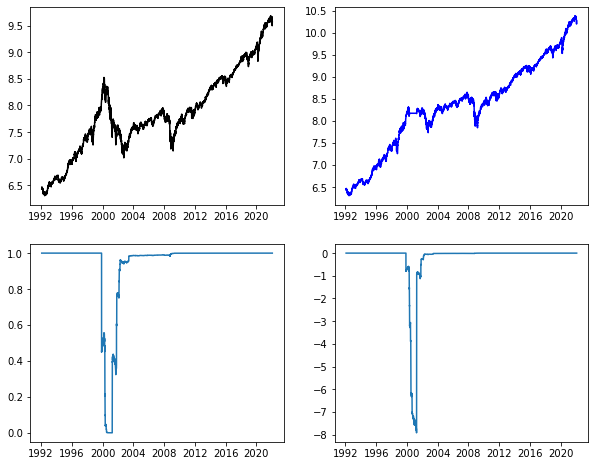



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1992-02-01
Successfully loaded params from ../data/pct_params/nasdaq_30yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.3462718831453224]},
    'sd': 0.0872815867619244,
    'window': 20}
 1: Final value: $14346.00 (window = 20; sd = 0.087)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_30yr_1param.json


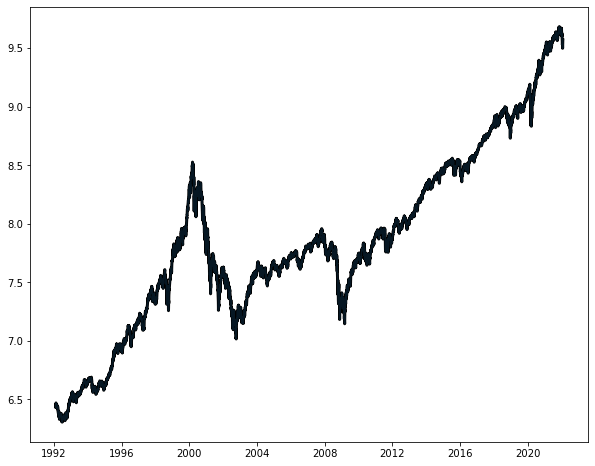

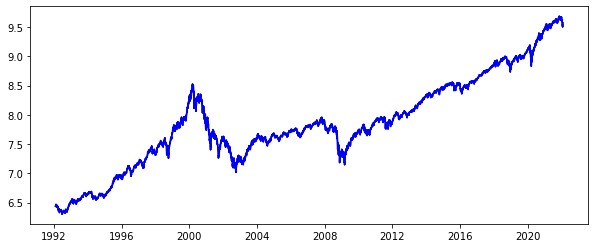

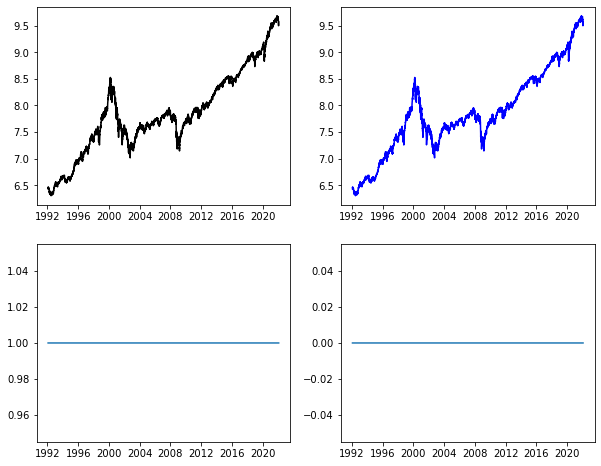

Percents in:
wilshire: [1.0, 1.0, 1.0]
nasdaq: [0.0104, 0.9999, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')